In [1]:
import tensorflow as tf
import numpy as np

from functions import create_samples,plot_clusters

In [2]:
n_features = 2
n_clusters = 3
n_samples_per_cluster = 500
seed= 700
embiggen_factor = 70
np.random.seed(seed)

centroids,samples = create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor, seed)

In [3]:
session = tf.Session()
sample_values = session.run(samples)
centroid_values = session.run(centroids)

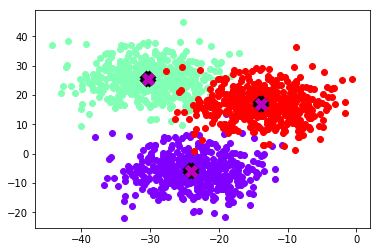

In [4]:
plot_clusters(sample_values,centroid_values,n_samples_per_cluster)

In [5]:
n_samples = samples.shape[0]
random_indices = tf.random_shuffle(tf.range(0,n_samples))
centroid_indices = tf.slice(random_indices,[0,],[n_clusters,])
initial_centroids = session.run(tf.gather(samples, centroid_indices))
print(initial_centroids)

[[-25.05387643  -4.37669086]
 [-35.72009758  17.23351517]
 [-28.93476827  -9.58631951]]


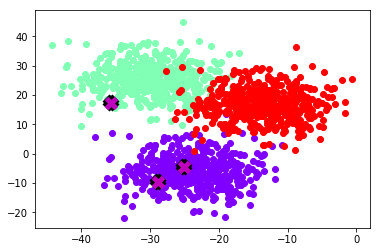

In [6]:
plot_clusters(sample_values,initial_centroids,n_samples_per_cluster)

In [11]:
expanded_vectors = tf.expand_dims(samples,0)
expanded_centroids = tf.expand_dims(centroids,1)
print(expanded_vectors)
print(expanded_centroids)
distances = tf.reduce_sum( tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
nearest_indices = tf.argmin(distances,0)
print(session.run(nearest_indices))

Tensor("ExpandDims_8:0", shape=(1, 1500, 2), dtype=float64)
Tensor("ExpandDims_9:0", shape=(3, 1, 2), dtype=float64)
[0 0 0 ..., 2 1 2]


In [19]:
nearest_indices = tf.to_int32(nearest_indices)
partitions = tf.dynamic_partition(samples,nearest_indices,n_clusters)
new_centroids = session.run(tf.concat([tf.expand_dims(tf.reduce_mean(partition,0),0) for partition in partitions],0))

[[-24.29080053  -5.32518191]
 [-30.66693114  26.2672581 ]
 [-14.03375731  17.37286812]]


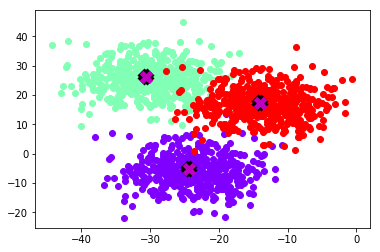

In [21]:
print(new_centroids)
plot_clusters(sample_values,new_centroids,n_samples_per_cluster)